# Fluxonium Design with 6 single qubits Version 3.3

## Properties
1. LaunchPads are 200um width and height
2. Charge line has a bulp shape ending
3. JJ Array_width = 410um, JJ_width = 120um
4. L=200nH

## Chages from V3.2
1. Ec(chargin energy) 1.00 GHz, was 1.25 GHz
2. Resonators: 6.00-8.00 GHz, were 5-7 GHz

## Design and EPR analysis

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


from qiskit_metal.qlibrary.terminations.ebeam_marker_v2 import Markers
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame

import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'  # our substrate is Silicon
# cpw_width and cpw_gap is defined from the beginnning if you need you can 
# change it later. But with this way one can be sure all the lines are having same width and gap.
design.variables['cpw_width'] = '15 um'  
design.variables['cpw_gap'] = '8.733 um'  
design._chips['main']['size']['size_x'] = '9mm'  # Our device size is 9*9mm
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

# run the GUI 
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.terminations.ebeam_marker_v2 import Markers
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame

## Markers for ebeam
options = dict(pos_x='3.25mm', pos_y='4.25mm')
mrk1 = Markers(design, 'marker1', options = options)

options = dict(pos_x='-3.25mm', pos_y='4.25mm')
mrk2 = Markers(design, 'marker2', options = options)

options = dict(pos_x='-3.25mm', pos_y='-4.25mm')
mrk3 = Markers(design, 'marker3', options = options)

options = dict(pos_x='3.25mm', pos_y='-4.25mm')
mrk4 = Markers(design, 'marker4', options = options)

options = dict(chip='main')
frame = Frame(design, 'frame', options = options)

gui.rebuild()

In [3]:
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)


Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '3970um', 'end_straight': '3970um',
                    # 'start_jogged_extension': jogs_in,
                    # 'anchors': anchors1,
                    }, 
                    'total_length': '8mm', 'fillet': "90um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

In [5]:
## Q1 flux-bias and charge line's lauch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-1.33mm', orientation='0',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line's lauch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='0.0mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='+1.33mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line's lauch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='3.99mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line's lauch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line's lauch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='0.0mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line's lauch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

In [4]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
         ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
                      
    flux_bias_line_options=Dict(make_fbl = True,
                            ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = True,
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))

# Q JJ1 Trial details
options = dict(chip='main',  nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.2mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ1 = FluxoniumPocket(design,'QJJ1', options = dict(
        **options))

# Q JJ2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.4mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,   
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ2 = FluxoniumPocket(design,'QJJ2', options = dict(
        **options))

# Q JJ3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.6mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,  
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ3 = FluxoniumPocket(design,'QJJ3', options = dict(
        **options))


# Q Array1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '1.0mm', pos_y = '0.6mm',
            gds_cell_inductor=gds_cell_name_inductor , pocket_width= '600um',
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
               ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr1 = FluxoniumPocket(design,'QArr1', options = dict(
             **options))


# Q Array2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '0.8mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor ,   
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                               ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr2 = FluxoniumPocket(design,'QArr2', options = dict(
        **options))

# Q Array3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor , 
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                      ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr3 = FluxoniumPocket(design,'QArr3', options = dict(
        **options))


gui.rebuild()

## Creating the resonators
After creating Qubits and Launch pads you can create the resonators, we use lambda/2 resonators. For that you need to have open_to_ground 

In [6]:
# Lambda/2 resonators - Resonator1
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
otg1 = ShortToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='7.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='short'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

gui.rebuild()

In [7]:
# Lambda/2 resonators - Resonator6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='7.8mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))

gui.rebuild()

In [7]:
# Lambda/2 resonators - Resonator2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-0.2mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='8.21mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

gui.rebuild()

In [10]:
# Lambda/2 resonators - Resonator5
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.1mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='8.71mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))

gui.rebuild()

In [11]:
# Lambda/2 resonators - Resonator3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='9.27mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

gui.rebuild()

In [12]:
# Lambda/2 resonators - Resonator4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.6mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='9.82mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

## Time to have the Charge and Flux-Bias lines

In [13]:
# Charge Line for Q1

XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                      ),
                         pin_inputs=Dict( start_pin=Dict(
                                          component='Q1',
                                               pin='charge_line'),
                                                end_pin=Dict(
                                            component='LPCL1',
                                            pin='tie')
                                            )))

gui.rebuild()

In [14]:
# Flux Bias Line for Q1

ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um', ),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [15]:
# Charge Lıne for Q2

XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='150um', end_straight='850um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL2',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [16]:
# Flux Bias Line for Q2

ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB2',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [17]:
# Charge Line for Q3

XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='500um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL3',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [18]:
# Flux Bias Line for Q3

ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                                   fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB3',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [19]:
# Charge Lıne for Q6

XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='250um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [20]:
# Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='350um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [21]:
# Charge Lıne for Q5

XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='150um', end_straight='850um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q5',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL5',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [22]:
# Flux Bias Line for Q5

ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q5',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB5',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [23]:
# Charge Line for Q4

XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                                 fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL4',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [24]:
# Flux Bias Line for Q4

ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB4',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [25]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '-1',                         
  'pad_width'         : '15um',                       
  'pad_height'        : '100um',                      
  'pad_radius'        : '60um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_pe

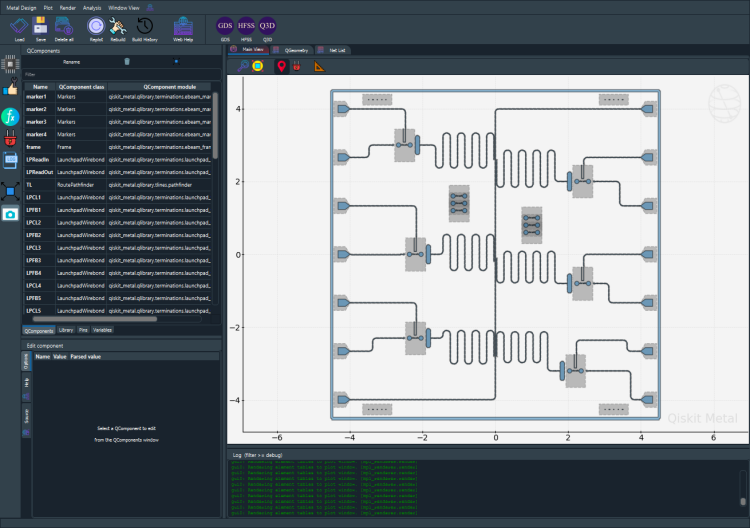

In [26]:
#Save screenshot as a .png formatted file.
gui.screenshot()

## Ansys QRenderer
How to Render a Metal Design into Ansys

In [8]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

!!!Make sure the software is open completly.

In [36]:
## Make sure the software is open completly then run the next cell.
hfss.open_ansys()

In [38]:
hfss.connect_ansys()

INFO 12:47PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:47PM [load_ansys_project]: 	Opened Ansys App
INFO 12:47PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 12:47PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project47
INFO 12:47PM [connect_design]: No active design found (or error getting active design).
INFO 12:47PM [connect]: 	 Connected to project "Project47". No design detected


First, we will simulate every resonator one by one to get their frequencies.

In [39]:
hfss.activate_eigenmode_design("cavity1")

12:47PM 40s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
12:47PM 40s WARNING [activate_ansys_design]: The design_name=cavity1 was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 12:47PM [connect_design]: 	Opened active design
	Design:    cavity1 [Solution type: Eigenmode]
WARNING 12:47PM [connect_setup]: 	No design setup detected.
WARNING 12:47PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:47PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [40]:
hfss.render_design(['cavity1'], [('cavity1', 'end'), ('cavity1', 'start')])

In [41]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 12:48PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


12:51PM 31s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


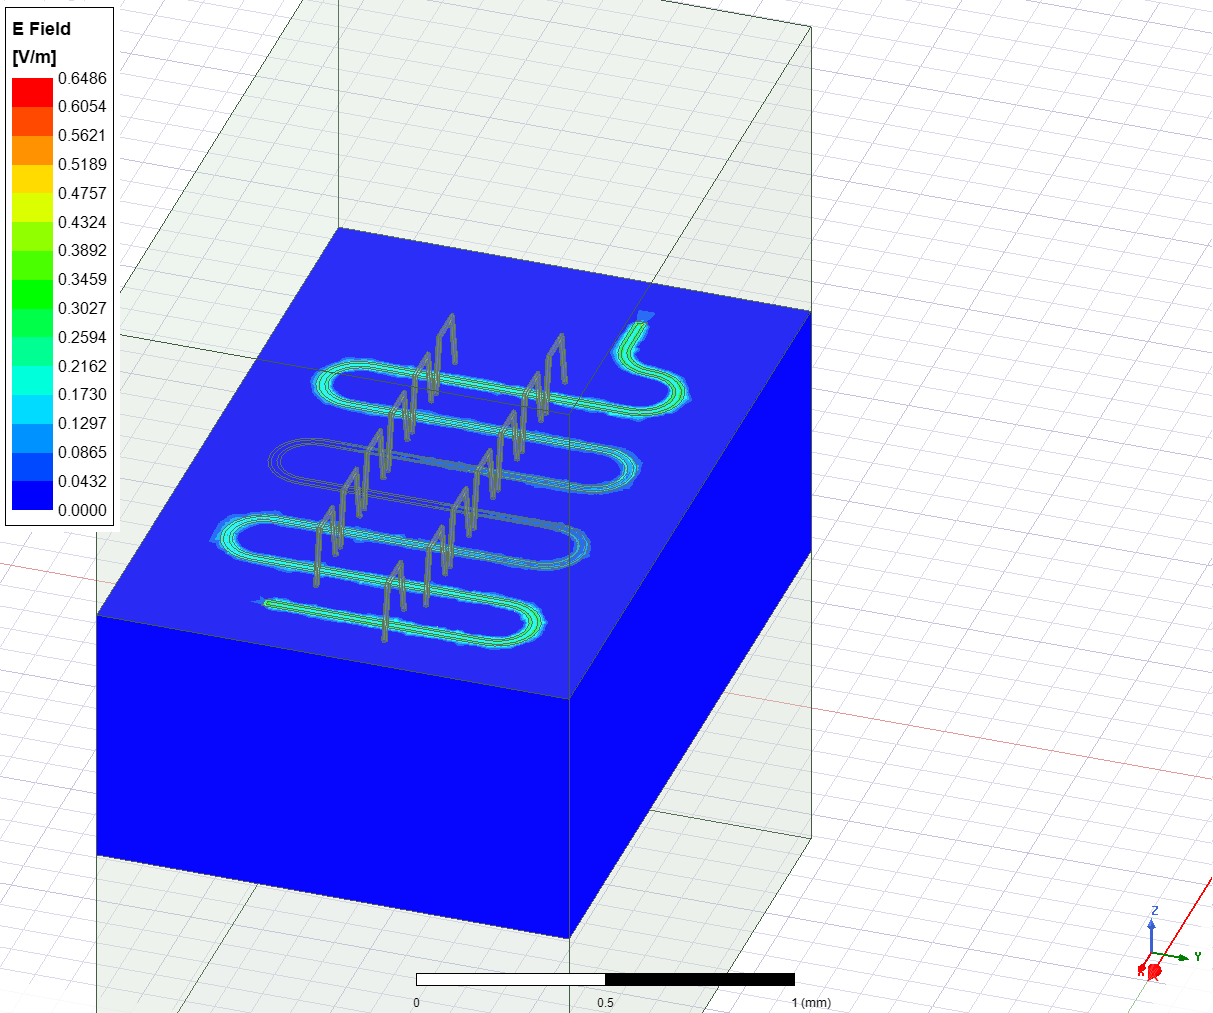

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [42]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [43]:
hfss.epr_get_frequencies()

Design "cavity1" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,8.002059,inf


In [18]:
hfss.activate_eigenmode_design("cavity6")

03:05PM 03s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:05PM 03s WARNING [activate_ansys_design]: The design_name=cavity6 was not in active project.  Designs in active project are: 
['cavity1'].  A new design will be added to the project.  
INFO 03:05PM [connect_design]: 	Opened active design
	Design:    cavity6 [Solution type: Eigenmode]
WARNING 03:05PM [connect_setup]: 	No design setup detected.
WARNING 03:05PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:05PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [19]:
hfss.render_design(['cavity6'], [('cavity6', 'end'), ('cavity6', 'start')])

In [20]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 03:05PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:09PM 51s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


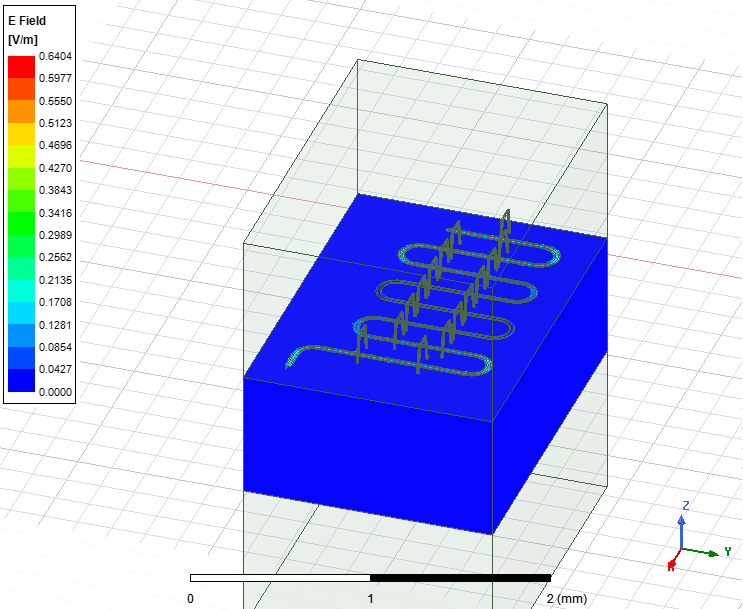

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [21]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [22]:
hfss.epr_get_frequencies()

Design "cavity6" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,7.609485,inf


In [23]:
hfss.activate_eigenmode_design("cavity2")

03:13PM 10s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:13PM 10s WARNING [activate_ansys_design]: The design_name=cavity2 was not in active project.  Designs in active project are: 
['cavity1', 'cavity6'].  A new design will be added to the project.  
INFO 03:13PM [connect_design]: 	Opened active design
	Design:    cavity2 [Solution type: Eigenmode]
WARNING 03:13PM [connect_setup]: 	No design setup detected.
WARNING 03:13PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [24]:
hfss.render_design(['cavity2'], [('cavity2', 'end'), ('cavity2', 'start')])

In [25]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 03:20PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


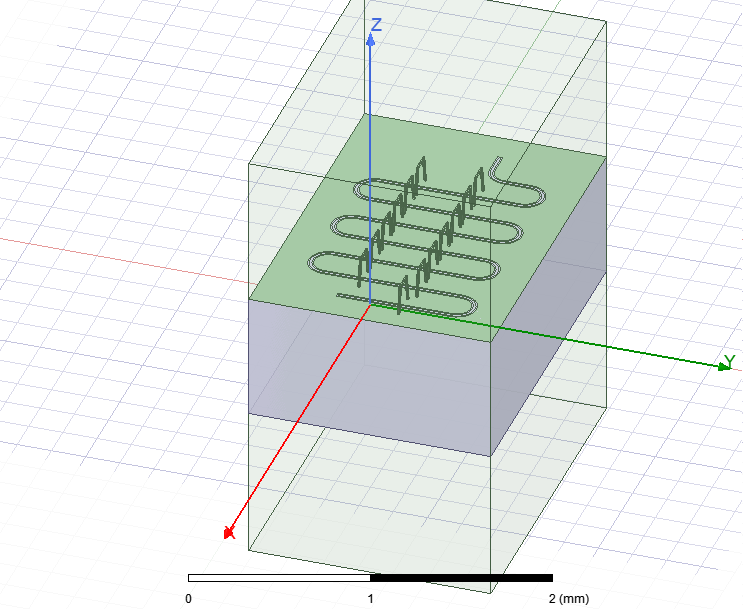

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [26]:
hfss.save_screenshot()

03:30PM 22s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


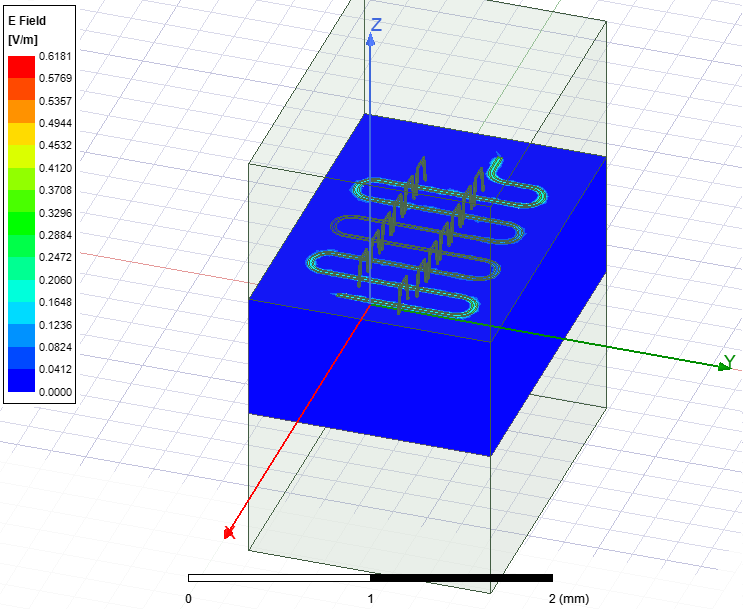

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [27]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [28]:
hfss.epr_get_frequencies()

Design "cavity2" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,7.206395,inf


In [29]:
hfss.activate_eigenmode_design("cavity5")

03:46PM 21s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:46PM 21s WARNING [activate_ansys_design]: The design_name=cavity5 was not in active project.  Designs in active project are: 
['cavity1', 'cavity6', 'cavity2'].  A new design will be added to the project.  
INFO 03:46PM [connect_design]: 	Opened active design
	Design:    cavity5 [Solution type: Eigenmode]
WARNING 03:46PM [connect_setup]: 	No design setup detected.
WARNING 03:46PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:46PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [30]:
hfss.render_design(['cavity5'], [('cavity5', 'end'), ('cavity5', 'start')])

In [31]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 03:46PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:48PM 43s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


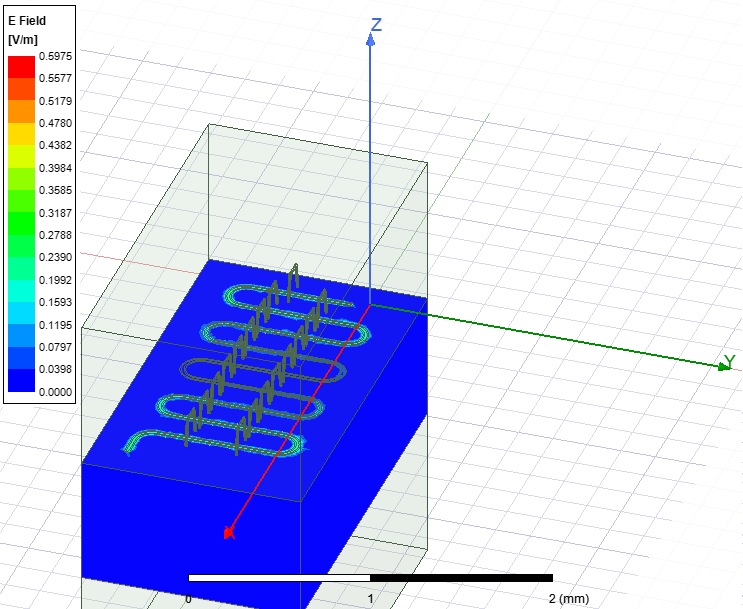

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [32]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [33]:
hfss.epr_get_frequencies()

Design "cavity5" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.828163,inf


In [34]:
hfss.activate_eigenmode_design("cavity3")

04:29PM 01s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
04:29PM 01s WARNING [activate_ansys_design]: The design_name=cavity3 was not in active project.  Designs in active project are: 
['cavity1', 'cavity6', 'cavity2', 'cavity5'].  A new design will be added to the project.  
INFO 04:29PM [connect_design]: 	Opened active design
	Design:    cavity3 [Solution type: Eigenmode]
WARNING 04:29PM [connect_setup]: 	No design setup detected.
WARNING 04:29PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:29PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [35]:
hfss.render_design(['cavity3'], [('cavity3', 'end'), ('cavity3', 'start')])

In [36]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 04:29PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


04:35PM 27s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


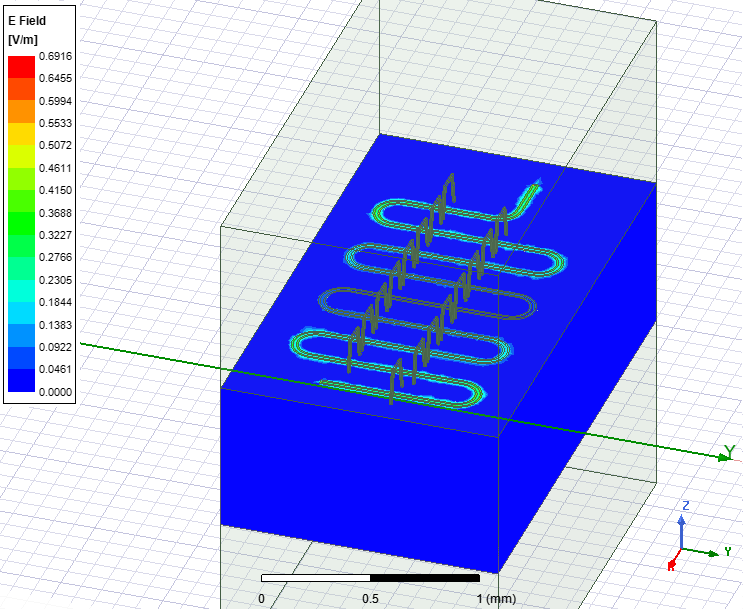

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [37]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [38]:
hfss.epr_get_frequencies()

Design "cavity3" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.399518,inf


In [39]:
hfss.activate_eigenmode_design("cavity4")

04:35PM 46s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
04:35PM 46s WARNING [activate_ansys_design]: The design_name=cavity4 was not in active project.  Designs in active project are: 
['cavity1', 'cavity6', 'cavity3', 'cavity2', 'cavity5'].  A new design will be added to the project.  
INFO 04:35PM [connect_design]: 	Opened active design
	Design:    cavity4 [Solution type: Eigenmode]
WARNING 04:35PM [connect_setup]: 	No design setup detected.
WARNING 04:35PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:35PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [40]:
hfss.render_design(['cavity4'], [('cavity4', 'end'), ('cavity4', 'start')])

In [41]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 04:36PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


04:39PM 42s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


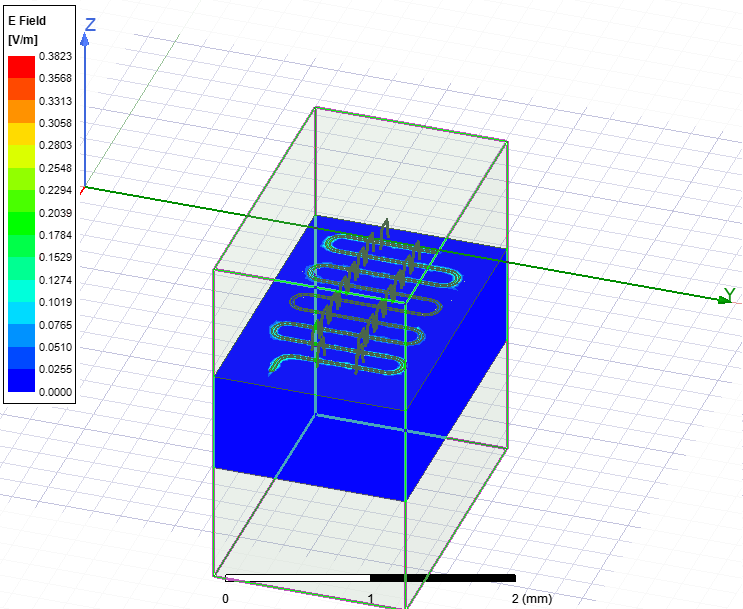

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [42]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [43]:
hfss.epr_get_frequencies()

Design "cavity4" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.032919,inf


In [44]:
QAnsysRenderer.get_template_options(design)

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [45]:
QAnsysRenderer.default_setup

{'drivenmodal': {'name': 'Setup',
  'freq_ghz': '5.0',
  'max_delta_s': '0.1',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '1'},
 'eigenmode': {'name': 'Setup',
  'min_freq_ghz': '1',
  'n_modes': '1',
  'max_delta_f': '0.5',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '-1'},
 'q3d': {'name': 'Setup',
  'freq_ghz': '5.0',
  'save_fields': 'False',
  'enabled': 'True',
  'max_passes': '15',
  'min_passes': '2',
  'min_converged_passes': '2',
  'percent_error': '0.5',
  'percent_refinement': '30',
  'auto_increase_solution_order': 'True',
  'solution_order': 'High',
  'solver_type': 'Iterative'},
 'port_inductor_gap': '10um'}

In [35]:
# Run this cell only if you are done with ANSYS
hfss.disconnect_ansys()

Warning! 6 COM references still alive
Ansys will likely refuse to shut down


## Now, we can use 2 eigenmodes to get the resonator and the qubit frequencies.
# Before one could get the BARE frequencies of a resonator, after this step you will get the DRESSED frequency of the resonator

In [44]:
hfss.activate_eigenmode_design()

12:52PM 09s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
12:52PM 09s WARNING [activate_ansys_design]: The design_name=MetalHFSSEigenmode was not in active project.  Designs in active project are: 
['cavity1'].  A new design will be added to the project.  
INFO 12:52PM [connect_design]: 	Opened active design
	Design:    MetalHFSSEigenmode [Solution type: Eigenmode]
WARNING 12:52PM [connect_setup]: 	No design setup detected.
WARNING 12:52PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:52PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [45]:
hfss.activate_eigenmode_design("Q1_Res1")

12:54PM 28s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
12:54PM 28s WARNING [activate_ansys_design]: The design_name=Q1_Res1 was not in active project.  Designs in active project are: 
['MetalHFSSEigenmode', 'cavity1'].  A new design will be added to the project.  
INFO 12:54PM [connect_design]: 	Opened active design
	Design:    Q1_Res1 [Solution type: Eigenmode]
WARNING 12:54PM [connect_setup]: 	No design setup detected.
WARNING 12:54PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:54PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [46]:
hfss.options['x_buffer_width_mm'] = 0.9
hfss.options['y_buffer_width_mm'] = 0.9
hfss.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.9,
 'y_buffer_width_mm': 0.9,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [47]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,21,inductor,"LINESTRING (-2.13500 -2.27700, -2.26500 -2.27700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
1,21,rect_jj,"LINESTRING (-2.18500 -2.30000, -2.21500 -2.30000)",1,False,False,main,0.010,34.38nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
2,22,inductor,"LINESTRING (2.26500 -3.17700, 2.13500 -3.17700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
3,22,rect_jj,"LINESTRING (2.21500 -3.20000, 2.18500 -3.20000)",1,False,False,main,0.010,34.38nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
4,23,inductor,"LINESTRING (-2.13500 0.02300, -2.26500 0.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
5,23,rect_jj,"LINESTRING (-2.18500 0.00000, -2.21500 0.00000)",1,False,False,main,0.010,34.38nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
6,24,inductor,"LINESTRING (2.46500 -0.77700, 2.33500 -0.77700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
7,24,rect_jj,"LINESTRING (2.41500 -0.80000, 2.38500 -0.80000)",1,False,False,main,0.010,34.38nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
8,25,inductor,"LINESTRING (-2.43500 3.02300, -2.56500 3.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
9,25,rect_jj,"LINESTRING (-2.48500 3.00000, -2.51500 3.00000)",1,False,False,main,0.010,34.38nH,0,0,0.000007,10nH,0,0,0.000007,junction_0


In [48]:
hfss.render_design(['Q1', 'cavity1', 'otg1s'],[('cavity1', 'end')])

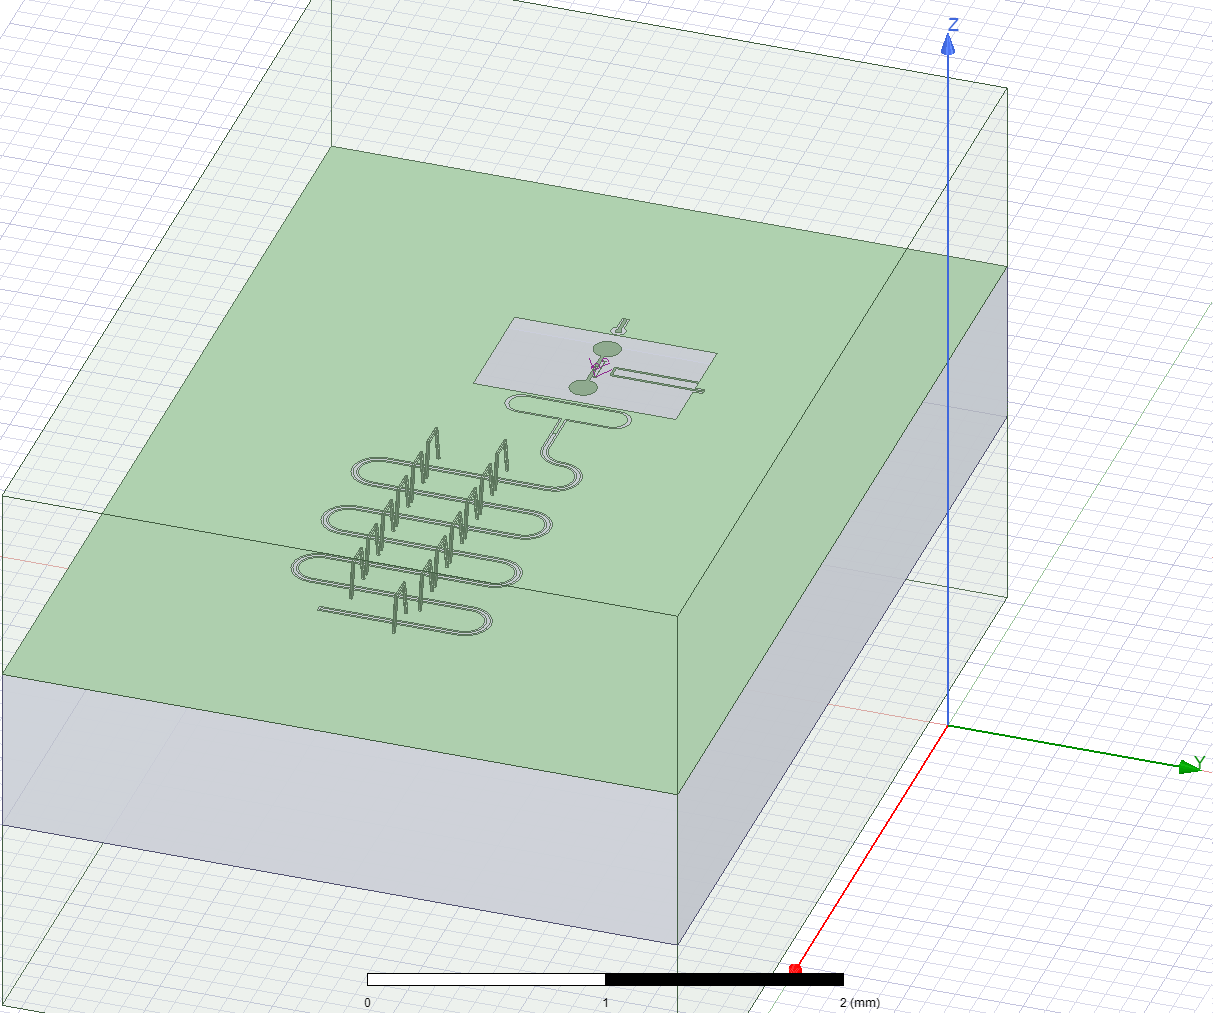

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [49]:
hfss.save_screenshot()

In [50]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
#setup.delta_f = 0.05
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '34.38 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 12:55PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


05:44PM 11s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


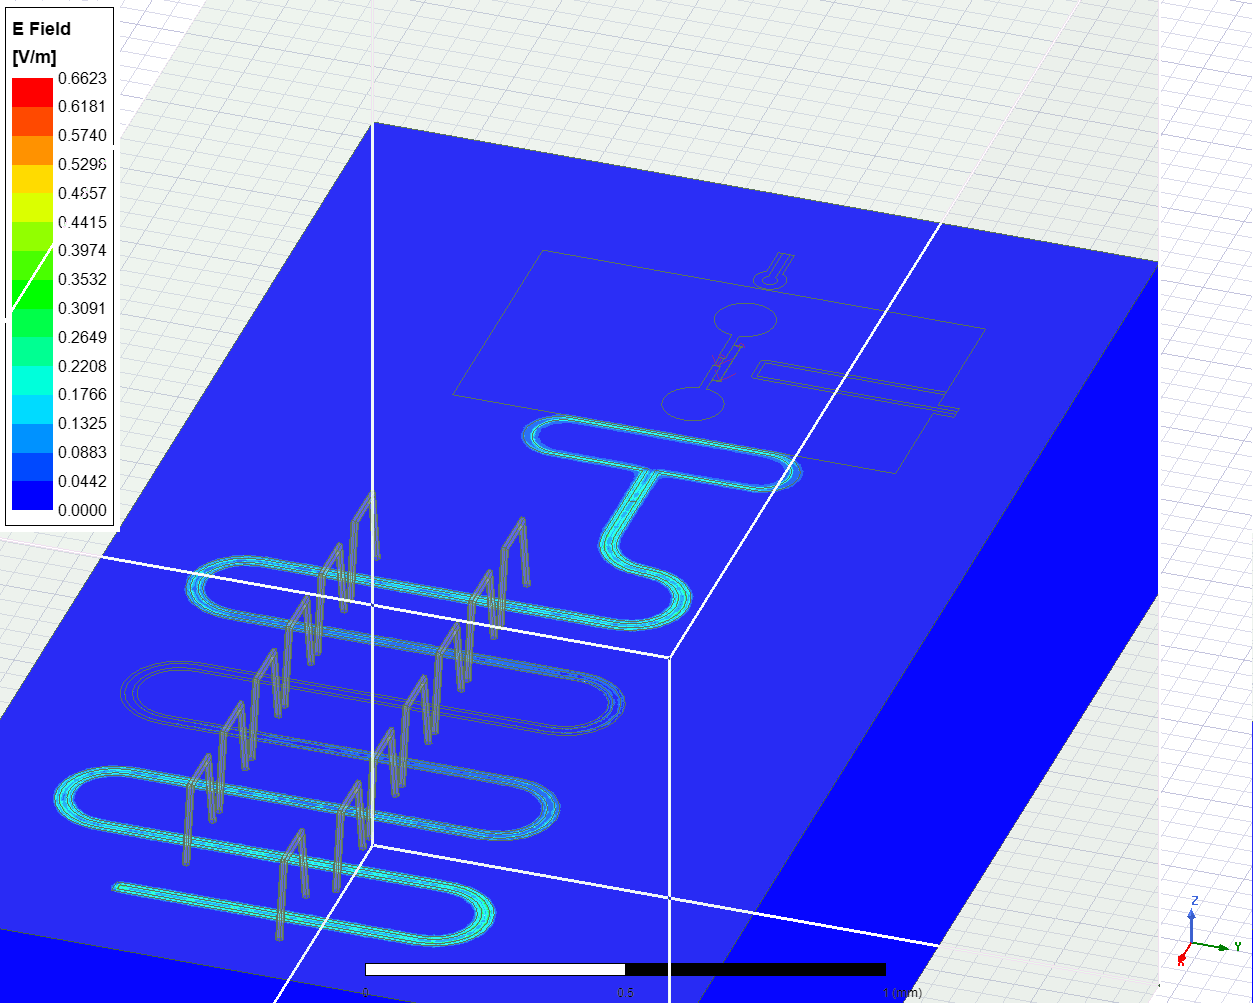

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [18]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [19]:
hfss.plot_ansys_delete(['Mag_E1'])

05:44PM 54s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [20]:
hfss.set_mode(2, "Setup")

INFO 05:44PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


05:44PM 58s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


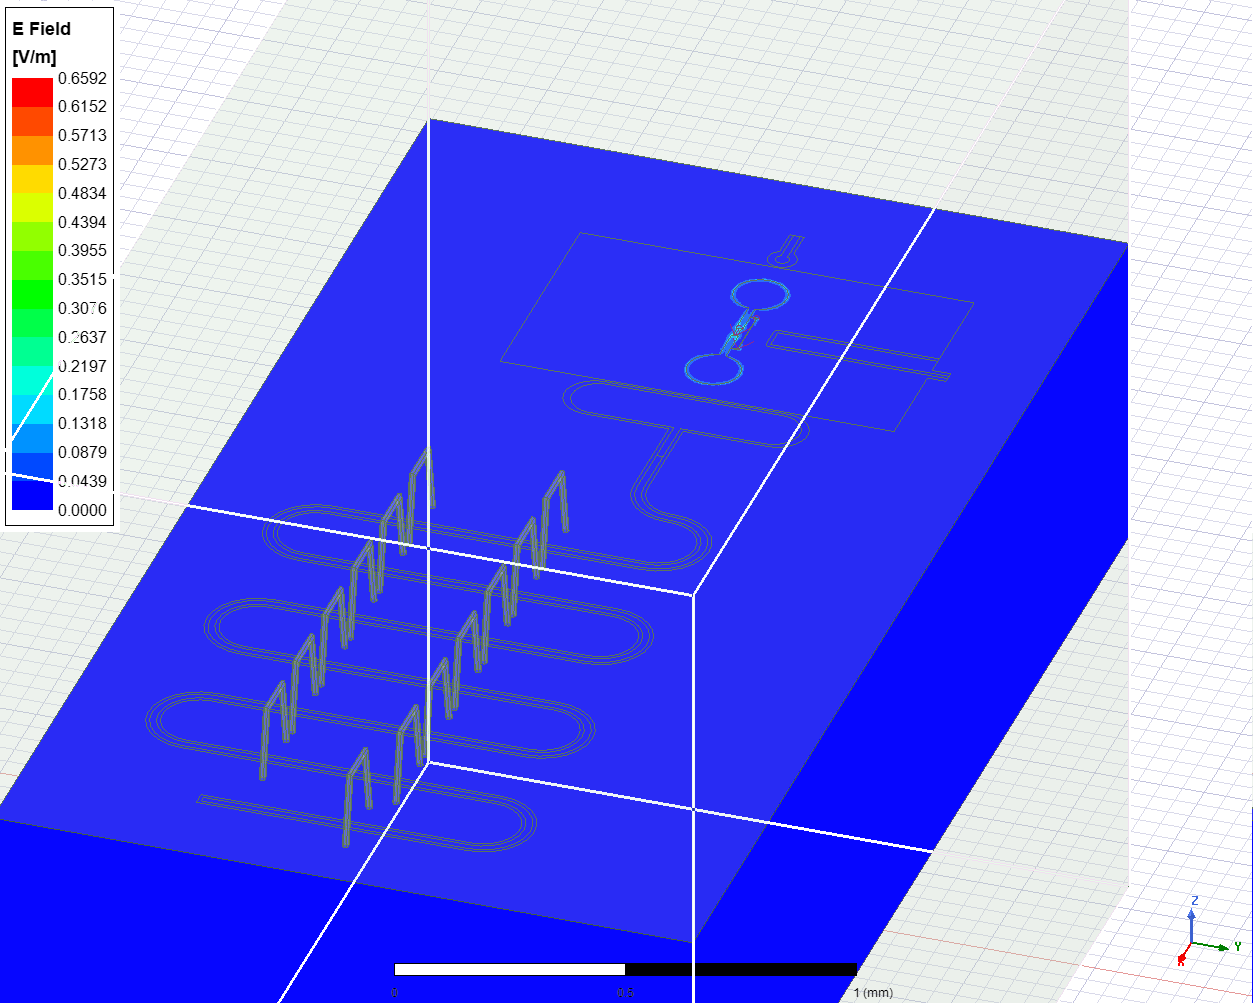

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [21]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

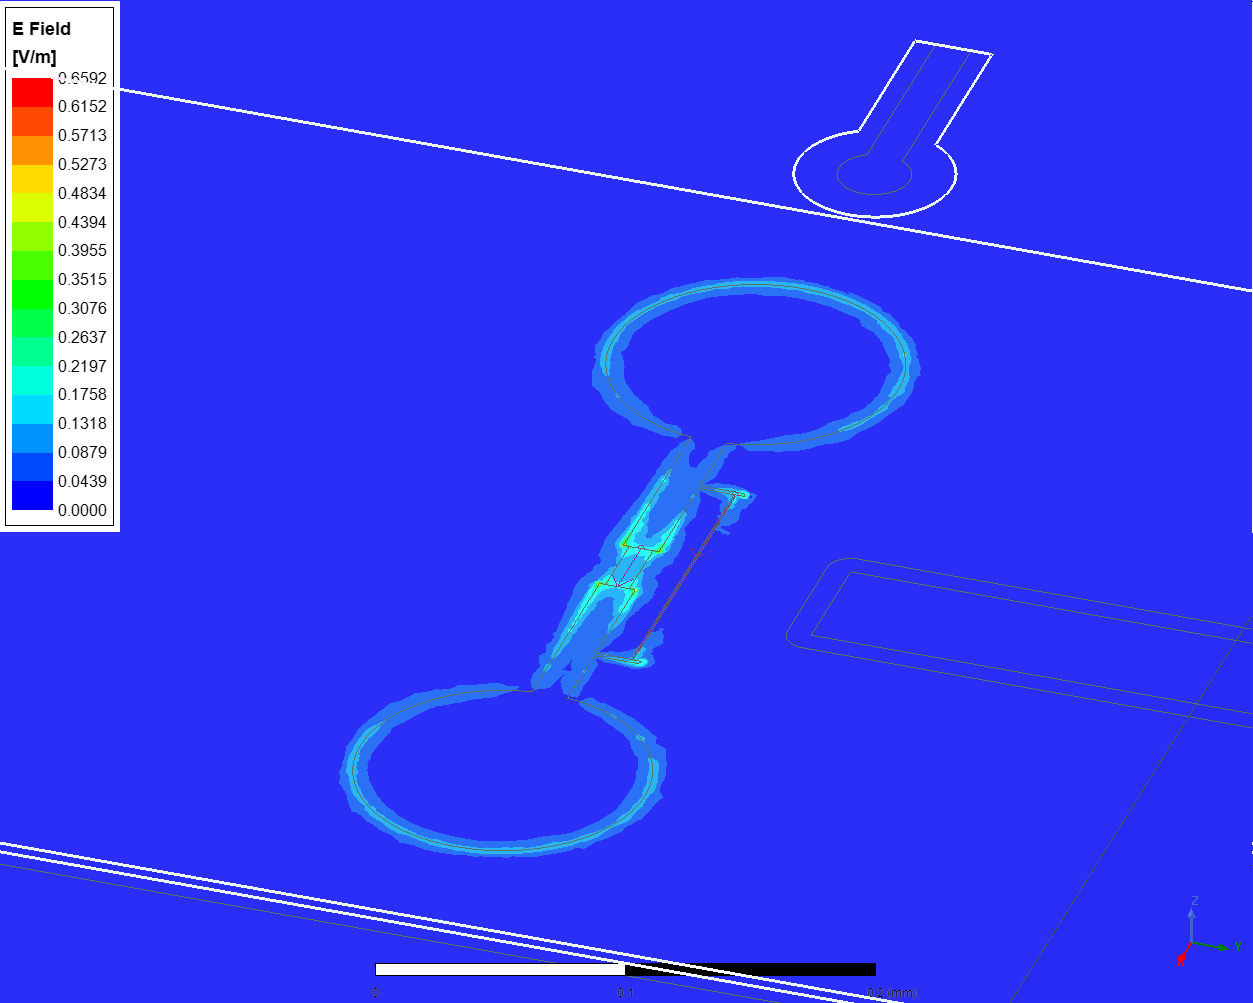

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [22]:
hfss.save_screenshot()

In [23]:
hfss.plot_ansys_delete(['Mag_E1'])

05:45PM 51s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


# Finite Element Analysis with EPR

After this point, you have to use the EPR version for Fluxonium and you need to have a new environment for that.
You can use that environment from the beginning too. 

In [11]:
eig_qb = EPRanalysis(design,"hfss")

In [12]:
eig_qb.sim.setup_update(n_modes = 2,
                        max_delta_f = 0.1,
                        min_freq_ghz = 1,
                        max_passes = 12)
eig_qb.sim.setup.vars.Lj = '34.3nH'
eig_qb.sim.setup.vars.Cj = '0.0nH'
eig_qb.sim.setup.vars.Ls = q1.options.l_inductance

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '34.3nH', 'Cj': '0.0nH', 'Ls': '200nH'}}

# Q1 and Res 1 
## Flux over loop

In [13]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q1', 'cavity1', 'otg1s'], open_terminations=[], box_plus_buffer = False)

INFO 01:53PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:53PM [load_ansys_project]: 	Opened Ansys App
INFO 01:53PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:53PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project47
INFO 01:53PM [connect_design]: 	Opened active design
	Design:    Q1_Res1 [Solution type: Eigenmode]
INFO 01:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:53PM [connect]: 	Connected to project "Project47" and design "Q1_Res1" 😀 

INFO 01:53PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
WARNING 01:53PM [connect_setup]: 	No design setup detected.
WARNING 01:53PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01

In [14]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,4.291540,4.716547
2,5.036989,5.571302
3,5.758756,6.458166
4,6.002244,6.547525
5,6.148284,6.762888
6,6.224885,6.902254
7,6.277973,6.979607
8,6.318129,7.013375
9,6.340991,7.028771


### Run EPR analysis

Perform EPR analysis for all modes and variations. Here, Quantum Analysis starts.

In [15]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q1_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q1_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [16]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 1.61442171592185e-25
        energy_elec_substrate = 1.48737436120177e-25
        EPR of substrate = 92.1%

        energy_mag    = 2.06238803649518e-27
        energy_mag % of energy_elec_all  = 1.3%
        

Variation 0  [1/1]

  Mode 0 at 6.39 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%  8.072e-26 1.031e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 90.03%
	jj              0.843853  (+)        0.093405
		Energy fraction (Lj over Lj&Cj)= 60.77%
	inductor         0.14494  (+)        0.0935468
		(U_tot_cap-U_tot_ind)/mean=8.47%
Ca

WARNING 04:23PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 04:23PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 16.9% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[3.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.7521594059197928
ϕzpf mode 1 :  0.06851907774519296
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


ERROR 04:23PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 16.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.186391
1    1.110132
dtype: float64

Pm_norm idx =
      jj  inductor
0   True     False
1  False     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.710941  0.122111
1  0.006339  0.001089

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
      0.84
    0.0063

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       763     12.7
      12.7   0.0525

*** Chi matrix ND (MHz) 
 -1.15e+03    -2.18
     -2.18 -0.00457

*** Frequencies O1 PT (MHz)
0    5624.087558
1    7052.518210
dtype: float64

*** Frequencies ND (MHz)
0    5511.672162
1    7055.760857
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,5511.67
1,7055.76


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj                       
34.3 0 -1153.73 -2.18e+00
     1    -2.18 -4.57e-03

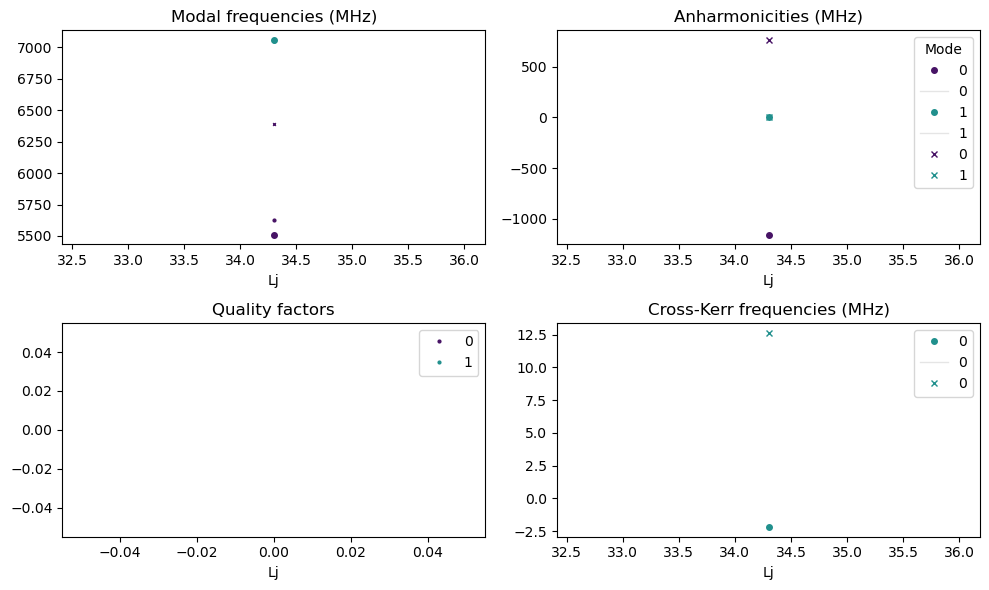

In [23]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

# Loop over flux

In [18]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

In [19]:
%matplotlib inline

(0.0, 10.0)

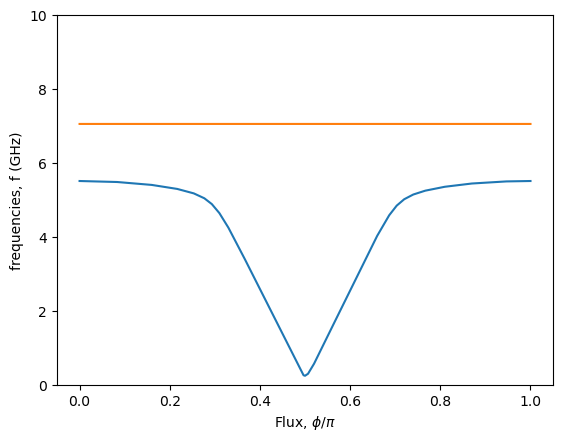

In [20]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

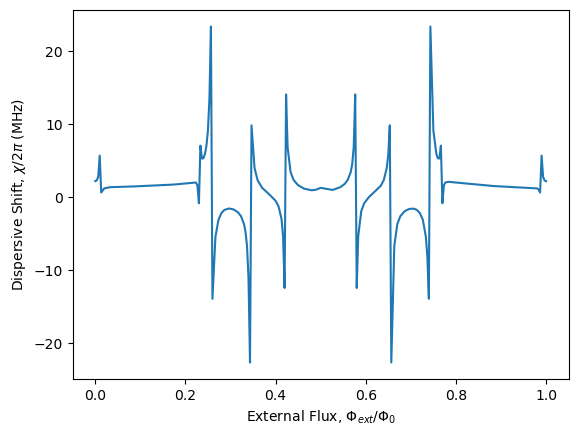

In [21]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

# Q2 and Res 2 
## Flux over loop

In [43]:
hfss.activate_eigenmode_design("Q2_Res2")

06:57PM 29s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
INFO 06:57PM [connect_design]: 	Opened active design
	Design:    Q2_Res2 [Solution type: Eigenmode]


In [44]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q2', 'cavity2', 'otg2s'], open_terminations=[], box_plus_buffer = False)

INFO 06:57PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 06:57PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:57PM [analyze]: Analyzing setup Setup
07:03PM 07s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\Desktop\qiskit-metal\tutorials_ME\Figen\Fluxonium\GDS-DR\hfss_eig_f_convergence.csv


In [45]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,4.807842,5.457375
2,5.232491,6.239367
3,5.666867,7.475650
4,5.968384,8.200375
5,6.176511,8.487761
6,6.267583,8.628448
7,6.332856,8.718070
8,6.384448,8.776575
9,6.404062,8.816202


In [46]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q2_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q2_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q2_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q2_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

07:03PM 59s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q2_rect_jj',
   'line': 'JJ_Lj_Q2_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q2_inductor',
   'line': 'JJ_Lj_Q2_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [47]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 2.08569558094795e-25
        energy_elec_substrate = 1.92173396109098e-25
        EPR of substrate = 92.1%

        energy_mag    = 2.57270019408469e-27
        energy_mag % of energy_elec_all  = 1.2%
        

Variation 0  [1/1]

  Mode 0 at 6.44 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  4.011e-24 4.007e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 89.91%
	jj              0.000436855  (+)        4.90361e-05
		Energy fraction (Lj over Lj&Cj)= 60.44%
	inductor        7.5274e-05  (+)        4.92674e-05
		(U_tot_cap-U_tot_ind)/mea

WARNING 07:05PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 07:05PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.8% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[3.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.01717692252562115
ϕzpf mode 1 :  0.8858284601945475
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


ERROR 07:05PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.8% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.570179
1    2.294942
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.000437  0.000075
1  0.366339  0.063111

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
   0.00044
      0.84

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  0.000207      1.1
       1.1 1.47e+03

*** Chi matrix ND (MHz) 
    0.0667     8.89
      8.89-2.63e+03

*** Frequencies O1 PT (MHz)
0    6437.395408
1    7428.277469
dtype: float64

*** Frequencies ND (MHz)
0    6435.494713
1    7108.616161
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,6435.49
1,7108.62


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                   
34.3 0  0.07     8.89
     1  8.89 -2631.85

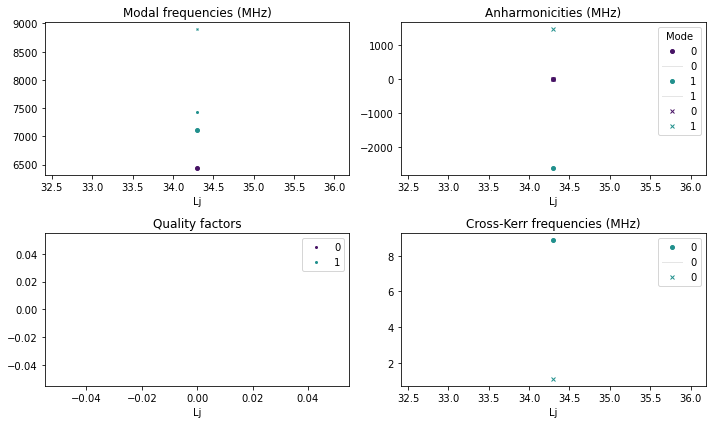

In [48]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

# Loop over flux Q2

In [49]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][0])
    freq_r.append(a['0'][1])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

(0.0, 10.0)

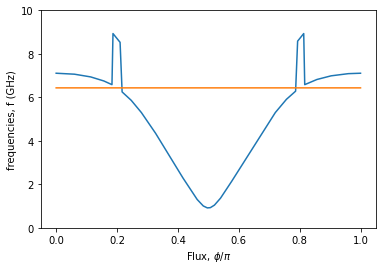

In [50]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

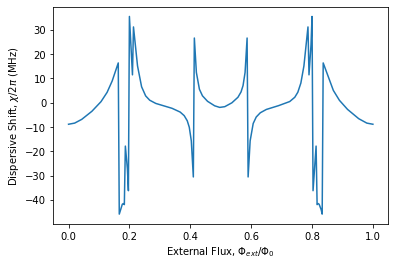

In [51]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

# Q3 and Res 3
## Flux over loop

In [52]:
hfss.clean_active_design()

In [53]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q3', 'cavity3', 'otg3s'], open_terminations=[], box_plus_buffer = False)

INFO 07:07PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 07:07PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:07PM [analyze]: Analyzing setup Setup
07:15PM 41s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\Desktop\qiskit-metal\tutorials_ME\Figen\Fluxonium\GDS-DR\hfss_eig_f_convergence.csv


In [54]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,4.450431,5.464345
2,4.811530,7.353067
3,5.202373,8.126870
4,5.454606,8.456373
5,5.597492,8.631460
6,5.662977,8.728549
7,5.716970,8.788615
8,5.746171,8.831229
9,5.762890,8.863484


In [55]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q3_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q3_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q3_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q3_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

07:16PM 39s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q3_rect_jj',
   'line': 'JJ_Lj_Q3_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q3_inductor',
   'line': 'JJ_Lj_Q3_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [56]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 8.9082105883788e-26
        energy_elec_substrate = 8.21441254757228e-26
        EPR of substrate = 92.2%

        energy_mag    = 1.1411023099563e-27
        energy_mag % of energy_elec_all  = 1.3%
        

Variation 0  [1/1]

  Mode 0 at 5.78 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  4.746e-24 4.744e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 91.71%
	jj              0.000213023  (+)        1.92655e-05
		Energy fraction (Lj over Lj&Cj)= 65.47%
	inductor        3.67701e-05  (+)        1.93903e-05
		(U_tot_cap-U_tot_ind)/mean

WARNING 07:17PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 07:17PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[3.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.011364392883364672
ϕzpf mode 1 :  0.8869505511676977
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


ERROR 07:17PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.552241
1    2.297110
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.000213  0.000037
1  0.365751  0.063057

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
   0.00021
      0.84

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  3.97e-05    0.484
     0.484 1.47e+03

*** Chi matrix ND (MHz) 
   -0.0829     4.86
      4.86-2.63e+03

*** Frequencies O1 PT (MHz)
0    5778.520046
1    7449.577484
dtype: float64

*** Frequencies ND (MHz)
0    5778.076031
1    7127.468188
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,5778.08
1,7127.47


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                   
34.3 0 -0.08     4.86
     1  4.86 -2632.60

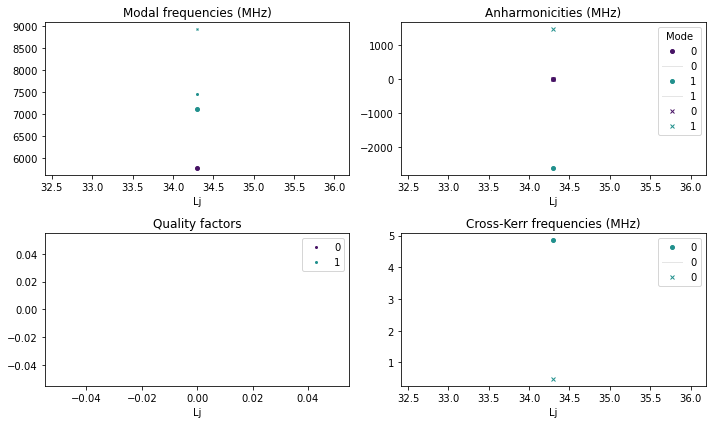

In [57]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

# Loop over flux Q3

In [63]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][0])
    freq_r.append(a['0'][1])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

(0.0, 10.0)

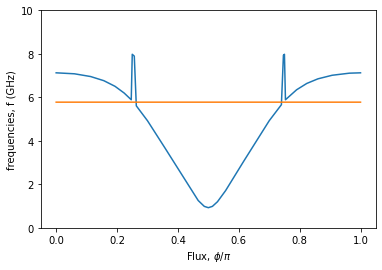

In [64]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

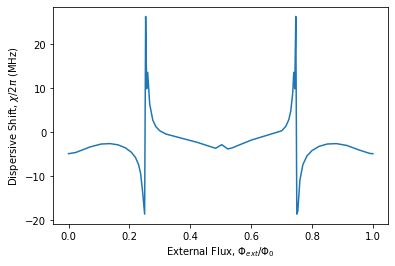

In [65]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

# Q4 and Res 4
## Flux over loop

In [66]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q4', 'cavity4', 'otg4s'], open_terminations=[], box_plus_buffer = False)

INFO 07:32PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 07:32PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:32PM [analyze]: Analyzing setup Setup
07:38PM 29s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\Desktop\qiskit-metal\tutorials_ME\Figen\Fluxonium\GDS-DR\hfss_eig_f_convergence.csv


In [67]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,4.288721,6.677282
2,4.585519,7.877124
3,5.083268,8.298641
4,5.218121,8.520862
5,5.298513,8.651435
6,5.386561,8.736023
7,5.425068,8.790011
8,5.460759,8.832352
9,5.471848,8.864670


In [68]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q4_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q4_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q4_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q4_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

07:38PM 37s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q4_rect_jj',
   'line': 'JJ_Lj_Q4_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q4_inductor',
   'line': 'JJ_Lj_Q4_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [69]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 7.51097027362795e-26
        energy_elec_substrate = 6.92386750782698e-26
        EPR of substrate = 92.2%

        energy_mag    = 9.83835970833176e-28
        energy_mag % of energy_elec_all  = 1.3%
        

Variation 0  [1/1]

  Mode 0 at 5.48 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  4.693e-24 4.691e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 92.47%
	jj              0.000157865  (+)        1.28492e-05
		Energy fraction (Lj over Lj&Cj)= 67.82%
	inductor        2.71962e-05  (+)        1.29073e-05
		(U_tot_cap-U_tot_ind)/me

WARNING 07:40PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 07:40PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[3.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.009528789346509484
ϕzpf mode 1 :  0.8864772151998813
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


ERROR 07:40PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.546140
1    2.298059
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.000158  0.000027
1  0.365500  0.062981

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
   0.00016
      0.84

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  1.96e-05     0.34
      0.34 1.47e+03

*** Chi matrix ND (MHz) 
  -0.00323      4.4
       4.4-2.62e+03

*** Frequencies O1 PT (MHz)
0    5482.011292
1    7445.728396
dtype: float64

*** Frequencies ND (MHz)
0    5481.749055
1    7125.322387
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,5481.75
1,7125.32


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                       
34.3 0 -3.23e-03     4.40
     1  4.40e+00 -2621.79

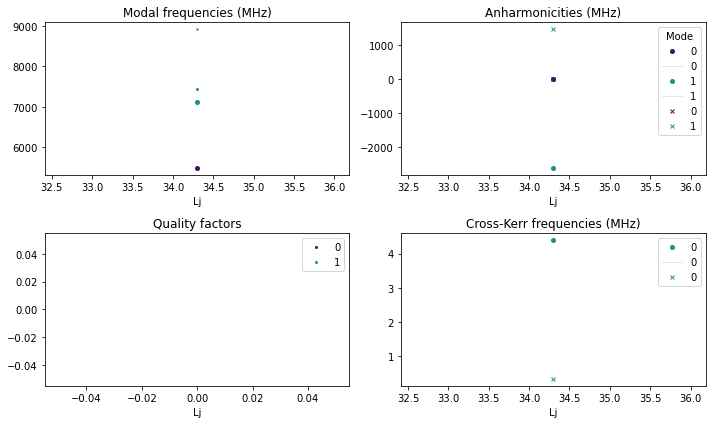

In [70]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

# Loop over flux Q4

In [71]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

(0.0, 10.0)

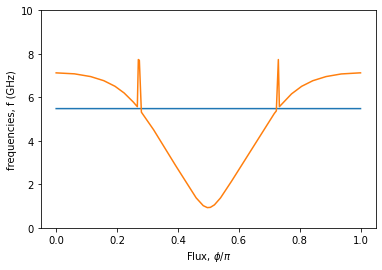

In [72]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

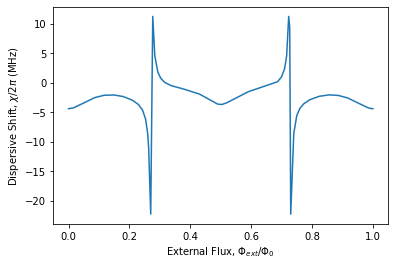

In [73]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

# Q5 and Res 5
## Flux over loop

In [74]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q5', 'cavity5', 'otg5s'], open_terminations=[], box_plus_buffer = False)

INFO 07:49PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 07:49PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:49PM [analyze]: Analyzing setup Setup
07:55PM 53s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\Desktop\qiskit-metal\tutorials_ME\Figen\Fluxonium\GDS-DR\hfss_eig_f_convergence.csv


In [75]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,4.658201,7.244706
2,5.134964,7.939226
3,5.279947,8.374752
4,5.496588,8.597928
5,5.767751,8.709656
6,5.926144,8.769601
7,6.006237,8.814202
8,6.053751,8.849284
9,6.082899,8.871837


In [76]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q5_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q5_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q5_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q5_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

07:55PM 58s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q5_rect_jj',
   'line': 'JJ_Lj_Q5_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q5_inductor',
   'line': 'JJ_Lj_Q5_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [77]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 1.01414131029301e-25
        energy_elec_substrate = 9.34710701883464e-26
        EPR of substrate = 92.2%

        energy_mag    = 1.2459091468666e-27
        energy_mag % of energy_elec_all  = 1.2%
        

Variation 0  [1/1]

  Mode 0 at 6.11 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  4.131e-24 4.128e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 90.82%
	jj              0.000298702  (+)        3.01927e-05
		Energy fraction (Lj over Lj&Cj)= 62.92%
	inductor        5.14141e-05  (+)        3.03028e-05
		(U_tot_cap-U_tot_ind)/mea

WARNING 07:57PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 07:57PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[3.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.01383646641511107
ϕzpf mode 1 :  0.8870548437094599
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


ERROR 07:57PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.561036
1    2.297397
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.000299  0.000051
1  0.366006  0.063013

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
    0.0003
      0.84

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  8.73e-05    0.718
     0.718 1.48e+03

*** Chi matrix ND (MHz) 
    0.0292     6.03
      6.03-2.65e+03

*** Frequencies O1 PT (MHz)
0    6108.924493
1    7443.549166
dtype: float64

*** Frequencies ND (MHz)
0    6108.071077
1    7119.821442
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,6108.07
1,7119.82


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                   
34.3 0  0.03     6.03
     1  6.03 -2645.29

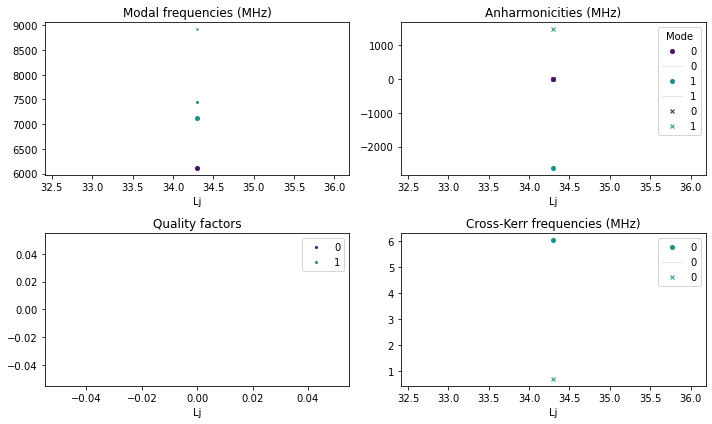

In [78]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

# Loop over flux Q5

In [79]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

(0.0, 10.0)

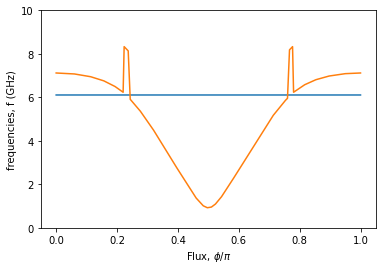

In [80]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

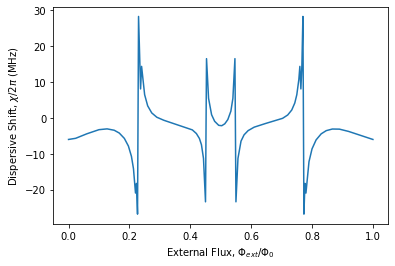

In [81]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

# Q6 and Res 6
## Flux over loop

In [7]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q6', 'cavity6', 'otg6s'], open_terminations=[], box_plus_buffer = False)

NameError: name 'eig_qb' is not defined

In [83]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,4.721861,4.871589
2,5.077498,6.364809
3,5.737442,7.711222
4,6.140306,8.246578
5,6.405172,8.495119
6,6.559961,8.629410
7,6.643437,8.719544
8,6.688589,8.780074
9,6.718864,8.825442


In [71]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q6_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q6_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q6_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q6_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

01:59PM 52s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q6_rect_jj',
   'line': 'JJ_Lj_Q6_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q6_inductor',
   'line': 'JJ_Lj_Q6_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [72]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 5.57054380875567e-24
        energy_elec_substrate = 5.12205971850672e-24
        EPR of substrate = 91.9%

        energy_mag    = 5.43143053168643e-24
        energy_mag % of energy_elec_all  = 97.5%
        

Variation 0  [1/1]

  Mode 0 at 6.39 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.0%  8.991e-26 2.726e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 90.04%
	jj              0.828488  (+)        0.0916005
		Energy fraction (Lj over Lj&Cj)= 60.80%
	inductor        0.142236  (+)        0.0916972
		(U_tot_cap-U_tot_ind)/mean=8.34%


WARNING 08:45PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 08:45PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[3.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.01383646641511107
ϕzpf mode 1 :  0.8870548437094599
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


ERROR 08:45PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 77.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.561036
1    2.297397
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.000299  0.000051
1  0.366006  0.063013

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
    0.0003
      0.84

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  8.73e-05    0.718
     0.718 1.48e+03

*** Chi matrix ND (MHz) 
    0.0292     6.03
      6.03-2.65e+03

*** Frequencies O1 PT (MHz)
0    6108.924493
1    7443.549166
dtype: float64

*** Frequencies ND (MHz)
0    6108.071077
1    7119.821442
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,34.3
0,6108.07
1,7119.82


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                   
34.3 0  0.03     6.03
     1  6.03 -2645.29

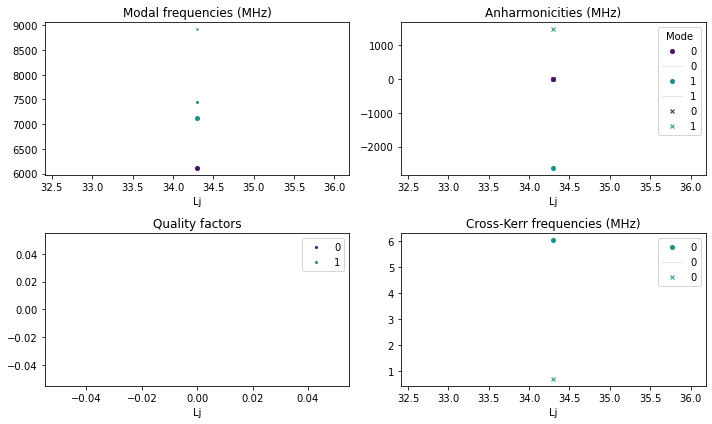

In [84]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

# Loop over flux Q6

In [85]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

(0.0, 10.0)

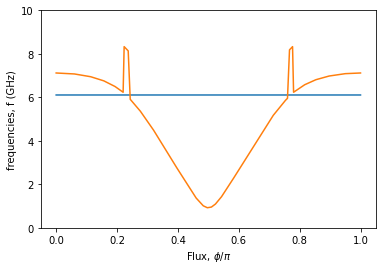

In [86]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

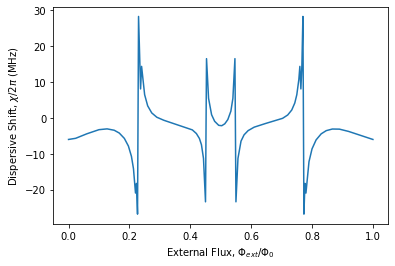

In [87]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

In [1]:
hfss.disconnect_ansys()

NameError: name 'hfss' is not defined

In [67]:
gui.main_window.close()

True